In [3]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [4]:
data_train = pd.read_csv("C:\\Users\\jayan\\OneDrive\\Desktop\\DM DATASET\\train.csv", na_values =['NA'])
columns = data_train.columns.values[0].split(';')
columns = [column.replace('"', '') for column in columns]
data_train = data_train.values
data_train = [items[0].split(';') for items in data_train]
data_train = pd.DataFrame(data_train,columns = columns)

data_train['job'] = data_train['job'].str.replace('"', '')
data_train['marital'] = data_train['marital'].str.replace('"', '')
data_train['education'] = data_train['education'].str.replace('"', '')
data_train['default'] = data_train['default'].str.replace('"', '')
data_train['housing'] = data_train['housing'].str.replace('"', '')
data_train['loan'] = data_train['loan'].str.replace('"', '')
data_train['contact'] = data_train['contact'].str.replace('"', '')
data_train['month'] = data_train['month'].str.replace('"', '')
data_train['day'] = data_train['day'].str.replace('"', '')
data_train['poutcome'] = data_train['poutcome'].str.replace('"', '')
data_train['y'] = data_train['y'].str.replace('"', '')

In [5]:
data_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [6]:
data_test = pd.read_csv("C:\\Users\\jayan\\OneDrive\\Desktop\\DM DATASET\\test.csv", na_values =['NA'])
data_test = data_test.values
data_test = [items[0].split(';') for items in data_test]
data_test = pd.DataFrame(data_test,columns = columns)

data_test['job'] = data_test['job'].str.replace('"', '')
data_test['marital'] = data_test['marital'].str.replace('"', '')
data_test['education'] = data_test['education'].str.replace('"', '')
data_test['default'] = data_test['default'].str.replace('"', '')
data_test['housing'] = data_test['housing'].str.replace('"', '')
data_test['loan'] = data_test['loan'].str.replace('"', '')
data_test['contact'] = data_test['contact'].str.replace('"', '')
data_test['month'] = data_test['month'].str.replace('"', '')
data_test['day'] = data_test['day'].str.replace('"', '')
data_test['poutcome'] = data_test['poutcome'].str.replace('"', '')
data_test['y'] = data_test['y'].str.replace('"', '')

In [7]:
data_test.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


In [8]:
def categorize(df):
    new_df = df.copy()
    le = preprocessing.LabelEncoder()
    
    new_df['job'] = le.fit_transform(new_df['job'])
    new_df['marital'] = le.fit_transform(new_df['marital'])
    new_df['education'] = le.fit_transform(new_df['education'])
    new_df['default'] = le.fit_transform(new_df['default'])
    new_df['housing'] = le.fit_transform(new_df['housing'])
    new_df['month'] = le.fit_transform(new_df['month'])
    new_df['loan'] = le.fit_transform(new_df['loan'])
    new_df['contact'] = le.fit_transform(new_df['contact'])
    new_df['day'] = le.fit_transform(new_df['day'])
    new_df['poutcome'] = le.fit_transform(new_df['poutcome'])
    new_df['y'] = le.fit_transform(new_df['y'])
    return new_df

In [9]:
data = pd.concat([data_train, data_test])
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [10]:
data.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [11]:
for col in data.select_dtypes(include='object').columns:
    print(col)
    print(data[col].unique())

age
['58' '44' '33' '47' '35' '28' '42' '43' '41' '29' '53' '57' '51' '45'
 '60' '56' '32' '25' '40' '39' '52' '46' '36' '49' '59' '37' '50' '54'
 '55' '48' '24' '38' '31' '30' '27' '34' '23' '26' '61' '22' '21' '20'
 '66' '62' '83' '75' '67' '70' '65' '68' '64' '69' '72' '71' '19' '76'
 '85' '63' '90' '82' '73' '74' '78' '80' '94' '79' '77' '86' '95' '81'
 '18' '89' '84' '87' '92' '93' '88']
job
['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
marital
['married' 'single' 'divorced']
education
['tertiary' 'secondary' 'unknown' 'primary']
default
['no' 'yes']
balance
['2143' '29' '2' ... '8205' '14204' '16353']
housing
['yes' 'no']
loan
['no' 'yes']
contact
['unknown' 'cellular' 'telephone']
day
['5' '6' '7' '8' '9' '12' '13' '14' '15' '16' '19' '20' '21' '23' '26'
 '27' '28' '29' '30' '2' '3' '4' '11' '17' '18' '24' '25' '1' '10' '22'
 '31']
month
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'd

In [12]:
features_na = [features for features in data.columns if data[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(data[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


In [13]:
for column in data.columns:
    print(column,data[column].nunique())

age 77
job 12
marital 3
education 4
default 2
balance 7168
housing 2
loan 2
contact 3
day 31
month 12
duration 1573
campaign 48
pdays 559
previous 41
poutcome 4
y 2


<AxesSubplot:xlabel='count', ylabel='job'>

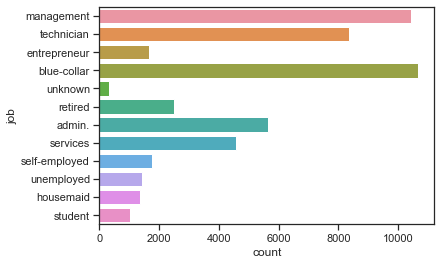

In [14]:
sns.set(style="ticks", color_codes=True)
sns.countplot(y='job', data=data)

In [15]:
data.job.value_counts()

blue-collar      10678
management       10427
technician        8365
admin.            5649
services          4571
retired           2494
self-employed     1762
entrepreneur      1655
unemployed        1431
housemaid         1352
student           1022
unknown            326
Name: job, dtype: int64

<AxesSubplot:xlabel='count', ylabel='marital'>

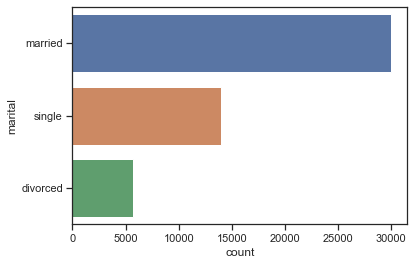

In [16]:
sns.countplot(y='marital', data=data)

In [17]:
data.marital.value_counts()

married     30011
single      13986
divorced     5735
Name: marital, dtype: int64

<AxesSubplot:xlabel='count', ylabel='education'>

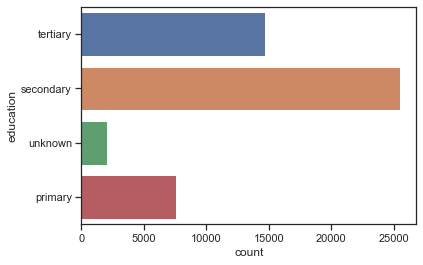

In [18]:
sns.countplot(y='education', data=data)

In [20]:
data.education.value_counts()

secondary    25508
tertiary     14651
primary       7529
unknown       2044
Name: education, dtype: int64

In [21]:
data.describe()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
count,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732,49732
unique,77,12,3,4,2,7168,2,2,3,31,12,1573,48,559,41,4,2
top,32,blue-collar,married,secondary,no,0,yes,no,cellular,20,may,124,1,-1,0,unknown,no
freq,2309,10678,30011,25508,48841,3871,27689,41797,32181,3009,15164,204,19278,40659,40659,40664,43922


<AxesSubplot:xlabel='count', ylabel='housing'>

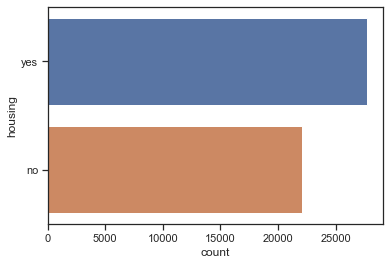

In [22]:
sns.countplot(y='housing',data=data)

<AxesSubplot:xlabel='count', ylabel='duration'>

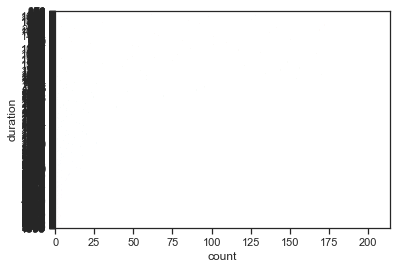

In [23]:
sns.countplot(y='duration',data=data)

<AxesSubplot:xlabel='count', ylabel='y'>

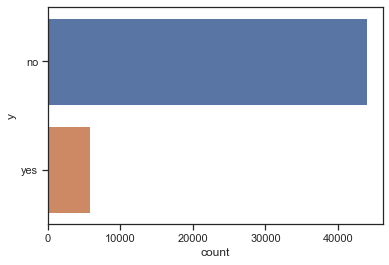

In [24]:
sns.countplot(y='y', data=data)

In [25]:
data.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [26]:
data = categorize(data)
data = data._convert(numeric=True)

<AxesSubplot:xlabel='y', ylabel='duration'>

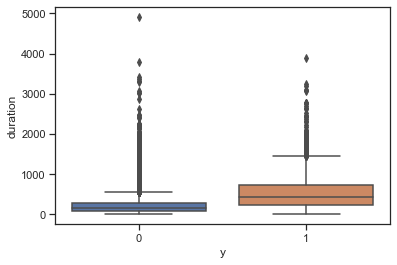

In [27]:
sns.boxplot(x='y', y='duration', data=data)

<AxesSubplot:xlabel='y', ylabel='education'>

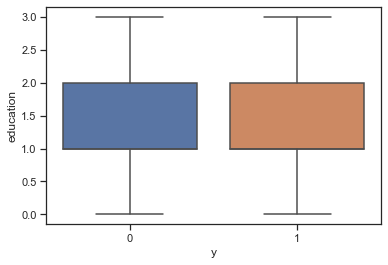

In [28]:
sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='education'>

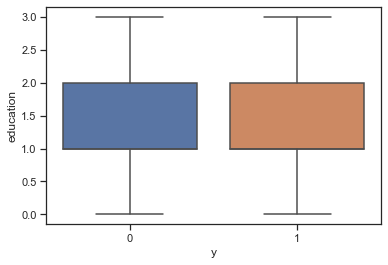

In [29]:
sns.boxplot(x='y', y='education', data=data)

<AxesSubplot:xlabel='y', ylabel='age'>

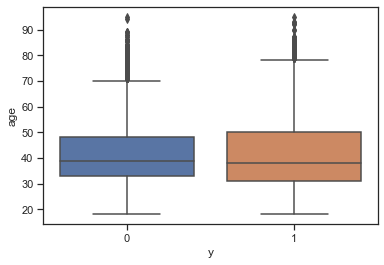

In [30]:
sns.boxplot(x='y',y='age',data=data)

C:\Users\jayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='job'>

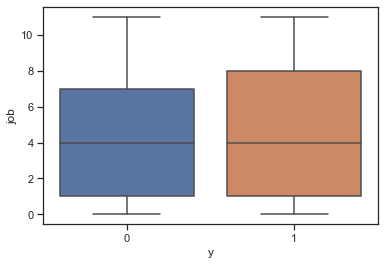

In [31]:
sns.boxplot(data['y'],data['job'])

C:\Users\jayan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='y', ylabel='campaign'>

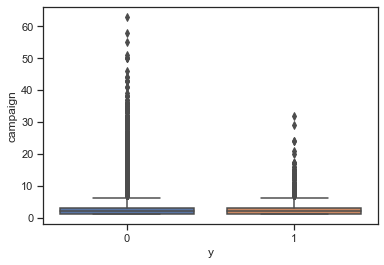

In [32]:
sns.boxplot(data['y'],data['campaign'])

In [33]:
def remove_outliers(df, column , minimum, maximum):
    col_values = df[column].values
    df[column] = np.where(np.logical_or(col_values<minimum, col_values>maximum), col_values.mean(), col_values)
    return df

In [34]:
min_val = data["duration"].min()
max_val = 1500
data = remove_outliers(df=data, column='duration' , minimum=min_val, maximum=max_val)

min_val = data["age"].min()
max_val = 80
data = remove_outliers(df=data, column='age' , minimum=min_val, maximum=max_val)

min_val = data["campaign"].min()
max_val = 6
data = remove_outliers(df=data, column='campaign' , minimum=min_val, maximum=max_val)

<AxesSubplot:xlabel='education', ylabel='count'>

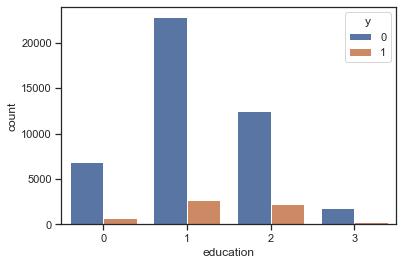

In [35]:
sns.countplot(x='education',hue='y',data=data)

<AxesSubplot:xlabel='default', ylabel='count'>

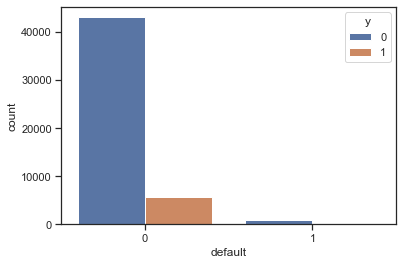

In [36]:
sns.countplot(x='default',hue='y',data=data)

In [37]:
data = data.drop('default',axis=1)

<AxesSubplot:xlabel='poutcome', ylabel='count'>

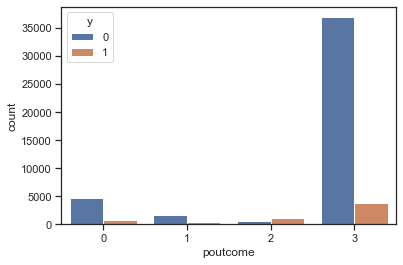

In [38]:
sns.countplot(x='poutcome',hue='y',data=data)

In [39]:
data = data.drop('poutcome',axis=1)

<AxesSubplot:xlabel='loan', ylabel='count'>

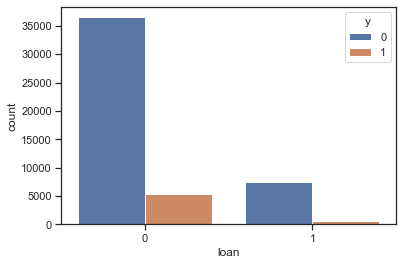

In [40]:
sns.countplot(x='loan',hue='y',data=data)

<AxesSubplot:xlabel='contact', ylabel='count'>

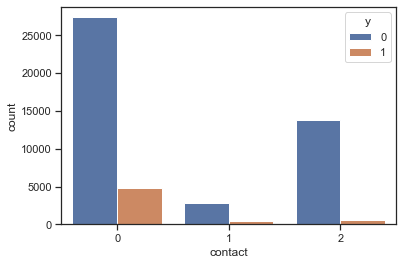

In [41]:
sns.countplot(x='contact',hue='y',data=data)

In [42]:
data=data.drop('contact',axis=1)

In [43]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49732 entries, 0 to 4520
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        49732 non-null  float64
 1   job        49732 non-null  int32  
 2   marital    49732 non-null  int32  
 3   education  49732 non-null  int32  
 4   balance    49732 non-null  int64  
 5   housing    49732 non-null  int32  
 6   loan       49732 non-null  int32  
 7   day        49732 non-null  int32  
 8   month      49732 non-null  int32  
 9   duration   49732 non-null  float64
 10  campaign   49732 non-null  float64
 11  pdays      49732 non-null  int64  
 12  previous   49732 non-null  int64  
 13  y          49732 non-null  int32  
dtypes: float64(3), int32(8), int64(3)
memory usage: 5.2 MB


In [44]:
data.head()

,age,job,marital,education,balance,housing,loan,day,month,duration,campaign,pdays,previous,y
0,58.0,4,1,2,2143,1,0,26,8,261.0,1.0,-1,0,0
1,44.0,9,2,1,29,1,0,26,8,151.0,1.0,-1,0,0
2,33.0,2,1,1,2,1,1,26,8,76.0,1.0,-1,0,0
3,47.0,1,1,3,1506,1,0,26,8,92.0,1.0,-1,0,0
4,33.0,11,2,3,1,0,0,26,8,198.0,1.0,-1,0,0


In [45]:
X = data.drop('y',axis = 1).values
y = data['y'].values
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.fit_transform(X_train)

In [47]:
pca = PCA(n_components=10)
pca.fit(X_train)
X_train = pca.fit_transform(X_train)

In [48]:
X_train.shape

(37299, 10)

In [49]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison-Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
models.append(('RandForest',RandomForestClassifier(max_depth = 8, n_estimators = 120)))

In [ ]:
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=None)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    msg = "{}: {}".format(name, cv_results.mean())
    print(msg)

In [ ]:
sns.set(rc={'figure.figsize':(10,8)})
sns.boxplot(names,results)

In [ ]:
scaler.fit(X_test)
X_test = scaler.fit_transform(X_test)

In [ ]:
pca.fit(X_test)
X_test = pca.fit_transform(X_test)

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, Y_train)
predictions = lr.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
cf_matrix=confusion_matrix(Y_test, predictions)
print("Confusion Matrix : \n",cf_matrix)
print("Classification Report: \n",classification_report(Y_test, predictions))
sns.heatmap(cf_matrix, annot=True)

In [ ]:
dt = DecisionTreeClassifier()
dt.fit(X_train, Y_train)
predictions = dt.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

In [ ]:
kn = KNeighborsClassifier()
kn.fit(X_train, Y_train)
predictions = kn.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))


In [52]:
sv =  SVC()
sv.fit(X_train, Y_train)
predictions = sv.predict(X_test)
print("Accuracy : ", accuracy_score(Y_test, predictions))
print("Confusion Matrix : \n",confusion_matrix(Y_test, predictions))
print("Classification Report: \n",classification_report(Y_test, predictions))

ValueError: X.shape[1] = 13 should be equal to 10, the number of features at training time